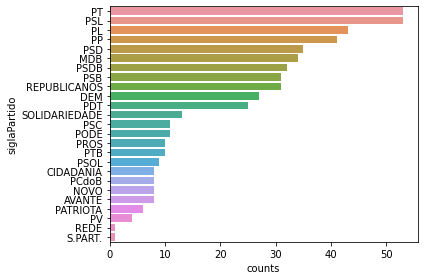

In [28]:
#Biblioteca que realiza a conexão com o json da camara
import requests
#Biblioteca que possibilita a criação do DataFrame
import pandas as pd
#Biblioteca para criar os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Cria o DataFrame
df = pd.DataFrame()

#URL da camara dos deputados
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome'
#passando a URL e recebendo um Json
resp = requests.get(url).json()
#Normalizando o Json em DataFrame
df = pd.json_normalize(resp['dados'])
#filtra o DF apenas pela sigla
df=df[['siglaPartido']]
#conta a quantidade de siglas
df= df.groupby(['siglaPartido']).size().reset_index(name='counts')


#criando uma figure, axes
fig, ax = plt.subplots()

#criando o gráfico de barras 
sns.barplot(x='counts', y='siglaPartido', data=df, order=df.groupby(["siglaPartido"])["counts"].mean().sort_values(ascending=False).index)

#otimizar espaço da figure
fig.tight_layout();

